In [61]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random as rng

Activity 1

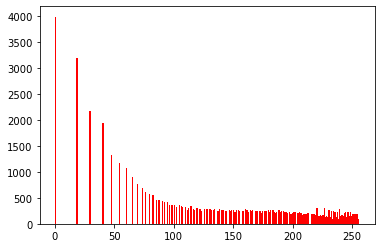

In [8]:
img1 = cv.imread('railway.jfif',0)

eq1 = cv.equalizeHist(img1)
eq2 = cv.equalizeHist(eq1)

plt.hist(eq1.ravel(), 256, [0,256], color = 'r')
plt.show()

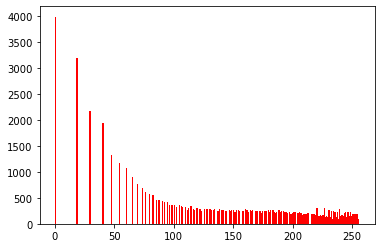

In [9]:
plt.hist(eq2.ravel(), 256, [0,256], color = 'r')
plt.show()

Result: there are no differences between the 2 images

Activity 2

In [16]:
img2 = cv.imread("electronic.jfif")
img2blur = cv.GaussianBlur(img2,(5,5),0)

Ksize = 3

sobel_x1 = cv.Sobel(img2, cv.CV_64F,1,0, ksize = Ksize)
sobel_y1 = cv.Sobel(img2, cv.CV_64F,0,1, ksize = Ksize)
grad1 = cv.magnitude(sobel_x1, sobel_y1)
grad1 = cv.convertScaleAbs(grad1)

sobel_x2 = cv.Sobel(img2blur, cv.CV_64F,1,0, ksize = Ksize)
sobel_y2 = cv.Sobel(img2blur, cv.CV_64F,0,1, ksize = Ksize)
grad2 = cv.magnitude(sobel_x2, sobel_y2)
grad2 = cv.convertScaleAbs(grad2)

laplacian1 = cv.Laplacian(img2, cv.CV_64F, ksize = Ksize)
laplacian_8u1 = cv.convertScaleAbs(laplacian1)

laplacian2 = cv.Laplacian(img2blur, cv.CV_64F, ksize = Ksize)
laplacian_8u2 = cv.convertScaleAbs(laplacian2)

cv.imshow('laplacian without blur', laplacian_8u1)
cv.imshow('laplacian with blur', laplacian_8u2)
cv.imshow('sobel without blur', grad1)
cv.imshow('sobel with blur', grad2)
cv.waitKey(0)
cv.destroyAllWindows()


Result:
    the optimal Kernal size is 1
    bluring sobel image has some effect on sobel while it has a massive effect on laplacian
    and based on the result, laplancian with Ksize of 1 can optimally find the objects edges

Activity 3

In [60]:
img3 = cv.imread("pineapple.jfif")
img3 = cv.GaussianBlur(img3,(5,5),0)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

Ksize = 3

sobel_x = cv.Sobel(img3, cv.CV_64F,1,0, ksize = Ksize)
sobel_y = cv.Sobel(img3, cv.CV_64F,0,1, ksize = Ksize)
grad = cv.magnitude(sobel_x, sobel_y)
grad = cv.convertScaleAbs(grad)

laplacian = cv.Laplacian(img3, cv.CV_64F, ksize = Ksize)
laplacian_8u = cv.convertScaleAbs(laplacian)

canny = cv.Canny(img3,100,200,apertureSize = 3)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img3, -1, kernelx)
prewitty = cv.filter2D(img3, -1, kernely)
prewitt = cv.bitwise_or(prewitty,prewittx)


scharrx = cv.Scharr(img3,-1,1,0)
scharry = cv.Scharr(img3,-1,0,1)
scharr = cv.bitwise_or(scharrx,scharry)

cv.imshow('sobel', grad)
cv.imshow('laplacian', laplacian_8u)
cv.imshow('canny', canny)
cv.imshow('prewitt', prewitt)
cv.imshow('scharr', scharr)
cv.waitKey(0)
cv.destroyAllWindows()

Result: Canny show the least noises

Activity 4